<h1>
<center>
Assignment 3: Classification: GDA and SVM
</center>
</h1>
<center>
CS 4262/5262 - Foundations of Machine Learning<br>
Vanderbilt University, Spring 2024<br>
Due: Check Brightspace
</center>
<hr>
<br>This assignment will focus on Gaussian Discriminant Analysis and Support Vector Machines. In addition to programming tasks, there are short-answer questions throughout the notebook. 

Contact: Gary Chung kuan-i.chung@vanderbilt.edu for any clarifying questions.

**Name**: <font color='blue'>Yuanhe Li

**Course**: <font color='blue'>CS 4262



---
## Part 1: Gaussian Discriminant Analysis (theoretical part)
During the class we derive the closed-form solution for the parameters $\phi$ and $\mu_1$. In this part, you will need to derive the closed-form solution for $\mu_0$ and $\Sigma$. You can start your derivation from stating the log-likelihood function and then take the derivative with respect to $\mu_0$ and $\Sigma$. Also, you will need to show why the decision boundary is linear when the covariance matrix is the same for both classes. And finally, GDA can be seen as a special case of logistic regression.

For 4262 students, you only need to do question 1, 3. For 5262 students, you need to finish all questions.

**Question 1:** Derive the closed-form solution for $\mu_0$.

<font color='blue'>
    
**Ans.:**
Let's start with 

$
l = \sum_{i=1}^m\log p(x^{(i)}|y^{(i)};\mu_0,\mu_1,\Sigma)p(y^{(i)},\phi)
=\sum_{i=1}^m \log\left( \frac{1}{(2\pi)^{\frac{n}{2}}|\Sigma|^{\frac{1}{2}}}\exp(-\frac{1}{2}(x^{(i)}-\mu_0)^T\Sigma^{-1}(x^{(i)}-\mu_0) ) \right) + \log(p(y^{(i)},\phi))
$

Since we don't care about $p(y^{(i)},\phi)$, we define that 
$
m = \sum_{i=1}^m \log\left( \frac{1}{(2\pi)^{\frac{n}{2}}|\Sigma|^{\frac{1}{2}}}\exp(-\frac{1}{2}(x^{(i)}-\mu_0)^T\Sigma^{-1}(x^{(i)}-\mu_0) ) \right)
$
and plugging in the $\log$ gives
    
$
m = \sum_{i=1}^m-\frac{n}{2}\log(2\pi)-\frac{1}{2}\log|\Sigma|-\frac{1}{2} (x^{(i)}-\mu_0)^T\Sigma^{-1}(x^{(i)}-\mu_0)
$

But then $\log(2\pi)-\frac{1}{2}\log|\Sigma|$ is a constant, so we take the derivative to get

$
\frac{\partial l}{\partial \mu_0} = \frac{\partial m}{\partial \mu_0} = \frac{\partial}{\partial \mu_0} \sum_{i=1}^m \left(-\frac{1}{2}(x^{(i)}-\mu_0)^T\Sigma^{-1}(x^{(i)}-\mu_0)\right) = \Sigma^{-1}\sum_{y^{(i)} = 0}(x^{(i)} - \mu_0) = 0
$
    
(The step above is because $\frac{\partial}{\partial x}(x^TBx)  = 2Bx$)

Since $\Sigma^{-1}$ is invertible, the only term that = 0 is $\sum_{y^{(i)} = 0}(x^{(i)} - \mu_0)$. Then, we have 
$\sum_{y^{(i)} = 0}x^{(i)} = \sum_{y^{(i)} = 0}\mu_0$ and hence $\mu_0m_0 = \sum_{y^{(i)} = 0}x^{(i)}$, where $m_0$ is the number of data points where $y^{(i)} = 0$.
    
Finally, we have
    
$
\mu_0 = \frac{1}{m_0}\sum_{y^{(i)} = 0}x^{(i)}
$
</font>


**Question 2 (optional for 4262):** Derive the closed-form solution for $\Sigma$.

<font color='blue'>

**Ans.:**  Thankfully, I don't have to do this.
 
</font>


**Question 3:** Show that the decision boundary for GDA is linear when the covariance matrices of the two classes are the same. Please derive in algebraic form. Something like
$$a^T x + b = 0$$
but showing $a^T$ and $b$ in terms of $\Sigma$, $\mu_0$, $\mu_1$, and $\phi$.

<font color='blue'>

**Ans.:** we start out with $p(y=1|x) = p(y=0|x)$. Then, using bayes, we have $\dfrac{p(x|y=1)p(y=1)}{p(x)} = \dfrac{p(x|y=0)p(y=0)}{p(x)}$. 

When we expand both sides in terms of the Gaussian distribution form, they share a non-zero common factor $\frac{1}{(2\pi)^{\frac{n}{2}}|\Sigma|^{\frac{1}{2}}}$. Elimiate it and taking $\log$ on both sides, we have
    
$
-\frac{1}{2}(x-\mu_1)^T\Sigma^{-1}(x-\mu_1) +\log \phi = -\frac{1}{2}(x-\mu_0)^T\Sigma^{-1}(x-\mu_0) +\log (1-\phi)
$
    
Get rid of $-\frac{1}{2}$ and expand both sides to get
$
-\frac{1}{2} x^{T} \Sigma^{-1} x+x^{T} \Sigma^{-1} \mu_{1}-\frac{1}{2} \mu_{1}^{T} \Sigma^{-1} \mu_{1}+\log \phi=-\frac{1}{2} x^{T} \Sigma^{-1} x+x^{T} \Sigma^{-1} \mu_{0}-\frac{1}{2} \mu_{0}^{T} \Sigma^{-1} \mu_{0}+\log(1-\phi)
$
    
Rearranging the terms,
    
$
x^{T} \Sigma^{-1}\left(\mu_{1}-\mu_{0}\right)=\frac{1}{2} \mu_{1}^{T} \Sigma^{-1} \mu_{1}-\frac{1}{2} \mu_{0}^{T} \Sigma^{-1} \mu_{0}+\log \frac{1-\phi}{\phi}
$

For dot product, $x^Ty = y^Tx$. We switch the position to get

$
\left(\Sigma^{-1}\left(\mu_{1}-\mu_{0}\right)\right)^{T}x = \frac{1}{2} \mu_{1}^{T} \Sigma^{-1} \mu_{1}-\frac{1}{2} \mu_{0}^{T} \Sigma^{-1} \mu_{0}+\log \frac{1-\phi}{\phi}
$
    
Hence $a^T = \left(\Sigma^{-1}\left(\mu_{1}-\mu_{0}\right)\right)^T$ and $b = -\frac{1}{2} \mu_{1}^{T} \Sigma^{-1} \mu_{1}+\frac{1}{2} \mu_{0}^{T} \Sigma^{-1} \mu_{0}-\log \frac{1-\phi}{\phi}$

**Brainstorming: (no marks or deduction)** Why is GDA can be considered as a logistic regression model? That is, why the following equation holds?
$$p(y=1|x) = \frac{1}{1 + e^{-(a^Tx+b)}}$$

where,

$$
a^T = (\mu_1-\mu_0)^T\Sigma^{-1}\\
$$

and

$$
b= \frac{1}{2}\mu_0^T\Sigma^{-1}\mu_0- \frac{1}{2}\mu_1^T\Sigma^{-1}\mu_1 +\log\frac{\phi}{1-\phi}
$$

In the later part, you can use the above equation to help you implement the GDA model.

<font color='blue'>
I think it comes from the fact that the covariance matrices are different. Then, $\frac{1}{(2\pi)^{\frac{n}{2}}|\Sigma|^{\frac{1}{2}}}$ this term gives the fractional part, and the $e$ part preserves due to some derivations...

---
## Part 2: Gaussian Discriminant Analysis (implementation part)


**Task 1**
- Write a function (or a set of functions) that takes in a set of training data and returns the maximum likelihood estimates of the parameters $\mu_0$, $\mu_1$, $\Sigma$, and $\phi$. Assume that the class covariance matrices are equal, which results in a linear decision boundary. You can use the formulas provided in the lecture notes for the maximum likelihood estimates of each parameter. 

- Load the Wine dataset (the same files as Assignment2 are included in this distribution). Choose columns of citric acid and total sulfur dioxide as input $x$. 
- Splitting into training/test sets in 80/20 ratio.
- Pick 50 samples for each class from the training set (100 in total).
- Plot as follows:
    - The training data points from each class in a scatter plot.
    - Show the $\mu_0$ and $\mu_1$ on the plot.
    - Giving different colors to the two classes.
    - The decision boundary on the same plot.
    - Set plotting limits to [-.08, 1.8] for citric acid and [-5, 360] for total sulfur dioxide.
- Calculate and report the model performance on test set. Please make sure to report F1 Score as well. 

In [1]:
import csv
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import scipy as sp
from sklearn import datasets
from sklearn.svm import SVC 
import pandas as pd

In [2]:
# TODO - write functions to calculate the GDA parameters, and estimate these parameters on the wine dataset.

class GDA:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.mu_0 = self.get_mu_0()
        self.mu_1 = self.get_mu_1()
        self.sigma = self.get_sigma()
        self.phi = self.get_phi()
    
    def get_mu_0(self):
        filtered_x = self.x[self.y == 0]
        return np.mean(filtered_x, axis=0)
        
    def get_mu_1(self):
        filtered_x = self.x[self.y == 1]
        return np.mean(filtered_x, axis=0)

    def get_sigma(self):
        return np.cov(self.x.T)

    def get_phi(self):
        return np.mean(self.y == 1)

    def sigmoid(self, z):
        return 1/(1 + np.exp(-z))
    
    @property
    def a_t(self):
        return (self.mu_1-self.mu_0).T @ np.linalg.inv(self.sigma)
    
    @property
    def b(self):
        # Calculate inverse first
        sigma_inv = np.linalg.inv(self.sigma)
        # Compute both terms
        first_term = 0.5 * np.dot(np.dot(self.mu_0.T, sigma_inv), self.mu_0)
        second_term = 0.5 * np.dot(np.dot(self.mu_1.T, sigma_inv), self.mu_1)
        return first_term - second_term + np.log(self.phi / (1 - self.phi))


    def predict(self, x_new, threshold=0.5):
        z = x_new @ self.a_t + self.b
        return self.sigmoid(z) > threshold
    
    def decision_boundary(self, x):
        return -(self.b + self.a_t[0] * x) / self.a_t[1]
    
    def plot(self):
        plt.scatter(self.x[self.y == 0][:, 0],
                    self.x[self.y == 0][:, 1],
                    label='0: white wine', alpha=0.2, marker='.')
        plt.scatter(self.x[self.y == 1][:, 0],
                    self.x[self.y == 1][:, 1],
                    label='1: red wine', alpha=0.2, marker='.')
        x1 = np.linspace(self.x[:, 0].min(), self.x[:, 0].max(), 100)
        x2 = self.decision_boundary(x1)
        plt.plot(x1, x2, label='Decision Boundary', c='green')
        plt.scatter(self.mu_0[0], self.mu_0[1], c='blue', marker='x', label='$\mu_0$', s=80)
        plt.scatter(self.mu_1[0], self.mu_1[1], c='brown', marker='x', label='$\mu_1$', s=80)
        plt.xlabel('citric acid')
        plt.ylabel('total sulfur dioxide')
        plt.title('GDA')
        plt.xlim(-.08, .8)
        plt.ylim(-5, 360)
        plt.legend()
        plt.show()

    def classification_report(self, y_true, y_pred):
        unique_labels = np.unique(np.concatenate((y_true, y_pred)))
        report_dict = {}
    
        for label in unique_labels:
            tp = np.sum((y_true == label) & (y_pred == label))
            fp = np.sum((y_true != label) & (y_pred == label))
            fn = np.sum((y_true == label) & (y_pred != label))
            
            precision = tp / (tp + fp) if (tp + fp) > 0 else 0
            recall = tp / (tp + fn) if (tp + fn) > 0 else 0
            f1_score = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
            support = np.sum(y_true == label)
            
            report_dict[label] = {
                "precision": precision,
                "recall": recall,
                "f1-score": f1_score,
                "support": support
            }
        
        # Optionally, compute and add overall averages to the report
        macro_precision = np.mean([metrics["precision"] for metrics in report_dict.values()])
        macro_recall = np.mean([metrics["recall"] for metrics in report_dict.values()])
        macro_f1 = np.mean([metrics["f1-score"] for metrics in report_dict.values()])
    
        return report_dict

In [3]:
# Load the wine dataset and split it.

# 1. Splitting the dataset, using sklearn library
from sklearn.model_selection import train_test_split

df = pd.read_csv("assignment3-wine_quality.csv")


# Select only the two cols we want
df = df[['citric acid', 'total sulfur dioxide', 'label']]

# Split the data into training and testing sets (80/20 split), randomized
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)

# Pick 50 samples for each class from the training set.
df_1 = train_df[train_df['label'] == 1.0].sample(n=50, random_state=42)
df_2 = train_df[train_df['label'] == 0.0].sample(n=50, random_state=42)

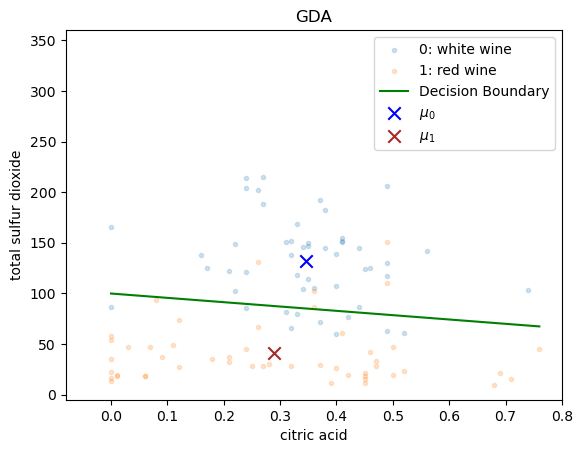

In [4]:
# run the experiment in Task 1

# To pass in, first concat
balanced_df = pd.concat([df_1, df_2])

# take those values
x = balanced_df[['citric acid', 'total sulfur dioxide']].values

# make the y input form fit.
y = balanced_df['label']

# Initialize model
model_gda = GDA(x, y)
model_gda.predict(x)
model_gda.plot()


In [5]:
# Repeat the same process using test set
df_0 = test_df[test_df['label'] == 0.0].sample(n=50, random_state=42)
df_1 = test_df[test_df['label'] == 1.0].sample(n=50, random_state=42)
balanced_df = pd.concat([df_0, df_1])
x = balanced_df[['citric acid', 'total sulfur dioxide']].values
y = balanced_df['label']

# Get the predictions
predictions = model_gda.predict(x)

# Did it do well?
model_gda.classification_report(y, predictions)

{0.0: {'precision': 0.8823529411764706,
  'recall': 0.9,
  'f1-score': 0.8910891089108911,
  'support': 50},
 1.0: {'precision': 0.8979591836734694,
  'recall': 0.88,
  'f1-score': 0.888888888888889,
  'support': 50}}

**Task 2:**

Increase to 1200 sample for class 1 only. Now we have 50 samples for class 0 and 1200 samples for class 1. And repeat the same process as in Task 1.


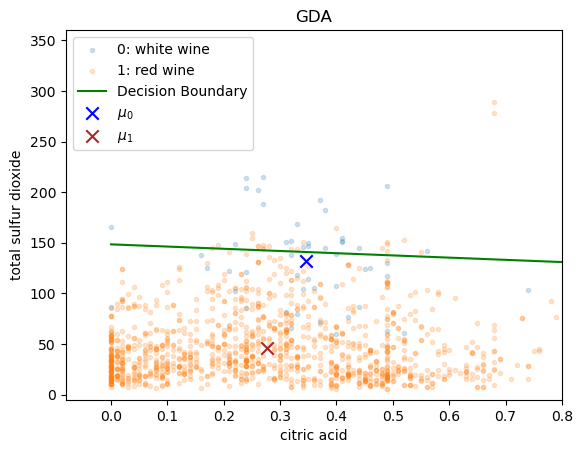

In [6]:
# run the experiment in Task 2
df_1 = train_df[train_df['label'] == 1.0].sample(n=1200, random_state=42)
df_2 = train_df[train_df['label'] == 0.0].sample(n=50, random_state=42)

balanced_df = pd.concat([df_1, df_2])

# take those values
x = balanced_df[['citric acid', 'total sulfur dioxide']].values

# make the y input form fit.
y = balanced_df['label']

# Initialize model
model_gda = GDA(x, y)
model_gda.predict(x)
model_gda.plot()


In [7]:
# Let's evaluate using 50 again.
df_0 = test_df[test_df['label'] == 0.0].sample(n=50, random_state=42)
df_1 = test_df[test_df['label'] == 1.0].sample(n=50, random_state=42)
balanced_df = pd.concat([df_0, df_1])
x = balanced_df[['citric acid', 'total sulfur dioxide']].values
y = balanced_df['label']

# Get the predictions
predictions = model_gda.predict(x)

# Did it do well?
model_gda.classification_report(y, predictions)

{0.0: {'precision': 1.0,
  'recall': 0.52,
  'f1-score': 0.6842105263157895,
  'support': 50},
 1.0: {'precision': 0.6756756756756757,
  'recall': 1.0,
  'f1-score': 0.8064516129032258,
  'support': 50}}

**Question 4:** Since the plotting limits are set to the same range for both tasks, what do you observe about the decision boundary?

<font color='blue'>

**Ans.:** When number of data is equal in each class, the line lies around midway between two class averages. When there's too many class 1, it went above both means. The slope of two graphs does not change, but the y-intercept of 1200 class 1, 50 class 0 is significantly higher.


**Question 5:** What do you observe about the model performance on the test set when the number of samples for class 1 is increased? Why do you think this happens?

<font color='blue'>
    
**Ans.:** When # of samples of class 1 is increased, overall the model becomes more extreme in predicting values.  It is better at predicting class 1, at a cost of predicting many wrong class 1 data points (they belong to class 0, but predicted as class 1).
    
For predicting red wines (class 1), since we fed many more data to it, it successfully predicts every red wine (recall value is 1), at a cost of misclassifying 33% of white wines as red. On the other hand, the model is very cautious in predicting white wines (class 0): out of all the white wine predictions, every prediction is correct. However, it is really bad (52%) at finding white wines. 
    
This happens because we fed too many class 1 data (compared with class 0 data size). This makes the model better at learning the characteristics of class 1, hence better at predicting it. 

**Question 6:**

Coding Task: What do you think the accuracy will be when the test data is imblanced as well. Develop model as same previous case. (Training phase will be same as **task 2**). For testing just consider 200 positive labed records from test set (y=1) and 20 negative labed records(y=0). Report testing results. Write your analysis based on below code results. Please report F1 score. Discuss about your observations on F1 score and compare it with accuracy in case of imbalanced data. 

In [8]:
# We still use model_gda as before, but
df_0 = test_df[test_df['label'] == 0.0].sample(n=20, random_state=42)
df_1 = test_df[test_df['label'] == 1.0].sample(n=200, random_state=42)

balanced_df = pd.concat([df_0, df_1])
x = balanced_df[['citric acid', 'total sulfur dioxide']].values
y = balanced_df['label']

# Get the predictions
predictions = model_gda.predict(x)

# Did it do well?
model_gda.classification_report(y, predictions)

{0.0: {'precision': 1.0,
  'recall': 0.45,
  'f1-score': 0.6206896551724138,
  'support': 20},
 1.0: {'precision': 0.9478672985781991,
  'recall': 1.0,
  'f1-score': 0.9732360097323601,
  'support': 200}}

<font color='blue'>
Precision for predicting red wines increases a lot. This is expected because the model tends to predict more red wines (even if it's white). If there's more red wines in the dataset, then naturally the precision increases.
    
F-1 score combines precision and recall into a single metric. The F-1 score for class 0 is around 0.621, for class 1 is around 0.973. There is an increase in class 1 compared with the balanced testing set, due to the increase in precision without any loss in recall. There is a decrease in class 0 compared with the balanced testing set, reflecting the effect of unchanged precision but decreased recall.
    
The accuracy can be misleading, because if a model simply predicts the majority class for all instances, it can still achieve a high accuracy (despite not being useful). For example, if the model predicted red wine for all 220 instances in the test set, it would be 200/220 = 90.9% accurate, despite having a 0% recall for white wine.
    
In this case, the high F1-score for class 1 reflects that the imbalance is favoring the majority class (which is seen from the previous balanced test set); the F1-score for class 0 provides a more accurate reflection of the model's performance on the minority class compared to accuracy.

---
## Part 3: Support Vector Machine

Now, you will apply a Support Vector Machine (with radial basis function kernel) to the [Wisconsin Breast Cancer dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html). Use the columns 'perimeter (mean)' and 'symmetry (mean)' for the input features in your calculations. Here, rather than writing your own SVM class, you will be calling functions provided in scikit-learn: [documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

**Question 7:** Why is feature scaling important when using a support vector machine with the RBF kernel?

<font color='blue'>
    
**Ans.** In short, you don't want scaling the data, or having extreme values, to influence the decision boundary. For example, multiplying every data value by 10 will not change decision boundary (inituitively), so it should not change your geometric margin (that determines the boundary). Also, if one feature has a much larger range of values than another, it can dominate the distance calculation, causing the SVM to ignore smaller-scale features.  RBF kernel has gamma ($\gamma$), that is sensitive to the scale of the data. Proper scaling can make the process of tuning gamma more efficient and effective.
    
</font>

**Task 3**
<br><br>Using the WBC dataset, shuffle the dataset, split it using a 80/20  train/test partition, and perform feature scaling. You may refer to your code from Assignment 2 for those steps. Refer to instructions regarding feature scaling in the Logistic Regression section of Assignment 2.

In [9]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Load the dataset
data_bunch = load_breast_cancer()
data = data_bunch.data
target = data_bunch.target

# Identify the indices for 'perimeter (mean)' and 'symmetry (mean)' columns
feature_names = data_bunch.feature_names
perimeter_mean_index = np.where(feature_names == 'mean perimeter')[0][0]
symmetry_mean_index = np.where(feature_names == 'mean symmetry')[0][0]

# Select only the 'perimeter (mean)' and 'symmetry (mean)' columns from the data
data_selected_features = data[:, [perimeter_mean_index, symmetry_mean_index]]

# Shuffle data and target in unison
data_selected_features, target = shuffle(data_selected_features, target, random_state=42)

# Split the data into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(data_selected_features, target, test_size=0.2, random_state=42)

# Function to standardize features for numpy arrays
def standardize_features_numpy(train, test):
    # Calculate the mean and std dev for each feature in the training set
    means = np.mean(train, axis=0)
    stds = np.std(train, axis=0)
    
    # Standardize the training and test data
    train_standardized = (train - means) / stds
    test_standardized = (test - means) / stds

    return train_standardized, test_standardized

# Apply the standardization function to your training and test sets
norm_train, norm_test = standardize_features_numpy(X_train, X_test)

**Question 8:** In the context of scikit-learn's SVM implementation (linked above), explain what hyperparameters C and gamma are, and describe the effects of increasing and decreasing their values.

<font color='blue'>
  
    
**Ans.** C is the regularization parameter. It reduces overfitting by penalizing large values in the decision function's coefficients. Increasing C decreases the regularization strength, which leads to a less smooth (more complex) decision boundary, leading to the risk of overfitting. Decreasing C increases the regularization strength, promoting a smoother and simpler decision boundary. It can lead to higher bias and lower variance, possibly underfitting the training data but potentially improving generalization to new data.

    
Gamma is the kernel coefficient. It defines the **influence** of a single training example. It affects the shape of the decision boundary by influencing how far the influence of a single training example reaches. Increasing gamma will make the decision boundary conform more closely to the training data, possibly leading to overfitting. Decreasing gamma leads to a smoother decision boundary, as the influence of individual points is spread out more broadly. This can help in reducing overfitting but might not capture complex patterns in the data.
</font>

**Task 4**

You will implement k-fold cross-validation to select the SVM hyperparameters. Note: you must write k-fold CV yourself, do not use sklearn.model_selection.KFold. However, you may use scikit-learn's SVC (you don't need to implement support vector machine yourself).

- Choose three values of C and three values of gamma that you wish to consider. Additionally, pick a value of _k_ (# of cross-validation folds) 
- For each pair of hyperparameter values (C, gamma), perform k-fold cross validation *within the training set* you designated above.  
- Report the pair of hyperparameter values that yields the highest accuracy (averaged across the k iterations) on this k-fold CV.
- Using that pair of hyperparameters, train a "final" SVM using the *entire* training set
- Run and report the accuracy of this model on the held-out test set. 

In [10]:
#TODO - k-fold cross validation on SVMs
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Hyperparameter options
C_values = [0.1, 1, 10]
gamma_values = [0.01, 0.1, 0.2]
k = 5  # Number of folds

# Function to split data into k folds
def split_k_folds(X, y, k):
    folds = []
    fold_size = len(X) // k
    indices = np.arange(len(X))
    
    for i in range(k):
        start = i * fold_size
        end = (i + 1) * fold_size if i != k - 1 else len(X)
        train_indices = np.concatenate([indices[:start], indices[end:]])
        val_indices = indices[start:end]
        folds.append((X[train_indices], y[train_indices], X[val_indices], y[val_indices]))
    
    return folds

# Function to perform k-fold CV
def k_fold_cv(X, y, k, C_values, gamma_values):
    best_score = 0
    best_params = {'C': None, 'gamma': None}
    folds = split_k_folds(X, y, k)
    
    for C in C_values:
        for gamma in gamma_values:
            cv_scores = []
            for X_train_fold, y_train_fold, X_val_fold, y_val_fold in folds:
                # Standardize the features for this fold
                train_mean, train_std = X_train_fold.mean(axis=0), X_train_fold.std(axis=0)
                X_train_fold_std = (X_train_fold - train_mean) / train_std
                X_val_fold_std = (X_val_fold - train_mean) / train_std
                
                # Train SVM, the default is RBF
                svm = SVC(C=C, gamma=gamma)
                svm.fit(X_train_fold_std, y_train_fold)
                
                # Evaluate on the validation fold
                val_predictions = svm.predict(X_val_fold_std)
                
                # accuracy_score is a quick way to calculate number of accuracies.
                # It returns a double <= 1 that shows what is the fraction that matches.
                score = accuracy_score(y_val_fold, val_predictions)
                cv_scores.append(score)
            
            # Average accuracy for current hyperparameters
            average_score = np.mean(cv_scores)
            print("C = ", C, " gamma = ", gamma, "with accuracy", average_score)
            if average_score > best_score:
                best_score = average_score
                best_params = {'C': C, 'gamma': gamma}
    
    return best_params, best_score

# Perform k-fold CV to find the best hyperparameters
best_params, best_score = k_fold_cv(norm_train, y_train, k, C_values, gamma_values)
print("Best Parameters:", best_params)
print("Best CV Score:", best_score)

# Train final model
train_mean, train_std = norm_train.mean(axis=0), norm_train.std(axis=0)
X_train_std = (norm_train - train_mean) / train_std
X_test_std = (norm_test - train_mean) / train_std

final_svm = SVC(C=best_params['C'], gamma=best_params['gamma'])
final_svm.fit(X_train_std, y_train)

# Evaluate on test set
final_predictions = final_svm.predict(X_test_std)
final_accuracy = accuracy_score(y_test, final_predictions)
print("Final Model Accuracy on Test Set:", final_accuracy)


C =  0.1  gamma =  0.01 with accuracy 0.6681318681318682
C =  0.1  gamma =  0.1 with accuracy 0.8857142857142856
C =  0.1  gamma =  0.2 with accuracy 0.8901098901098902
C =  1  gamma =  0.01 with accuracy 0.8857142857142856
C =  1  gamma =  0.1 with accuracy 0.9032967032967033
C =  1  gamma =  0.2 with accuracy 0.9010989010989011
C =  10  gamma =  0.01 with accuracy 0.9032967032967033
C =  10  gamma =  0.1 with accuracy 0.8989010989010989
C =  10  gamma =  0.2 with accuracy 0.8989010989010989
Best Parameters: {'C': 1, 'gamma': 0.1}
Best CV Score: 0.9032967032967033
Final Model Accuracy on Test Set: 0.8771929824561403


**Question 9:** Which pair of hyperparameters were selected by k-fold CV? What was the accuracy of the corresponding model on the held-out test set?

<font color='blue'>

**Ans.** C = 1 and $\gamma$ = 0.1 were selected by k-fold CV. The accuracy on the held-out test set is 0.8771929824561403 (Technically, C = 1 and C = 10 tied).

    

**Question 10:** Discuss the effects of changing C and gamma. To illustrate your response, generate plots of the decision boundary resulting from different values of C and gamma, in the following way:
- Using the 'best' value of C (selected based on k-fold CV above), sweep over 2-3 different values of gamma, generating one plot of the decision boundary (superimposed on the training points) each time. Use the entire training set.
- Repeat the above, this time using the 'best' value of gamma (selected based on k-fold CV above) and sweeping over 2-3 different values of C.

<font color='blue'>

**Ans.** The effect of changing C and gamma are similar: both large C (10) and large gamma (0.2) leads to model overfitting, but small C (0.1) and gamma (0.01) 's plot looks linear, and it fails to capture the complexity of our data set (they underfits). 

In [11]:
# The following code will plot the decision boundary on a dataset for a given classifier. 
# source: https://github.com/rasbt/python-machine-learning-book-2nd-edition/blob/master/code/ch02/ch02.ipynb
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # set up marker generator and color map
    markers = ('s', 'o', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])


    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

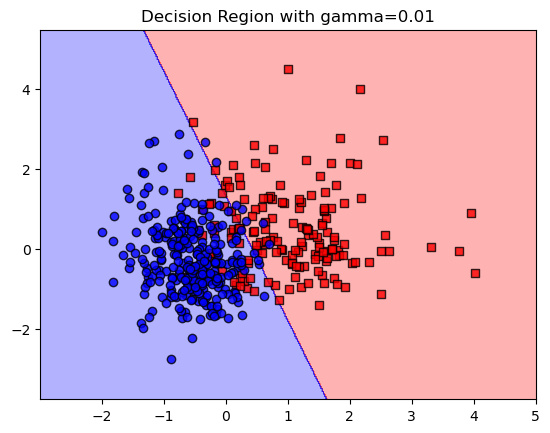

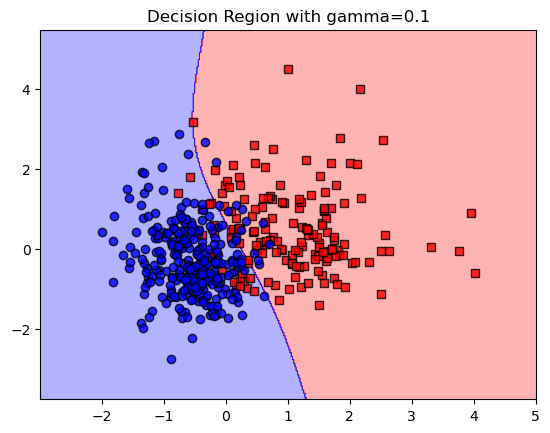

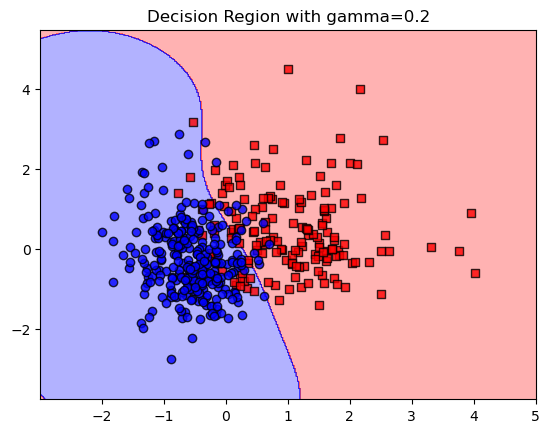

In [12]:
#TODO - analyze the effects of C and gamma

for g in gamma_values:
    model = SVC(C=1, gamma=g)
    model.fit(norm_train, y_train)
    
    # Create a new figure for each gamma value
    plt.figure()
    plot_decision_regions(norm_train, y_train, model)
    plt.title(f'Decision Region with gamma={g}')
    plt.show()


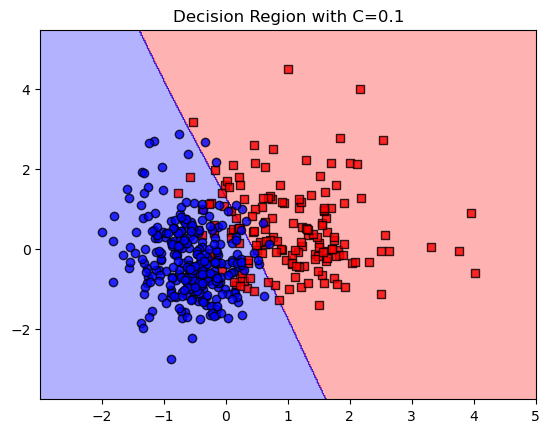

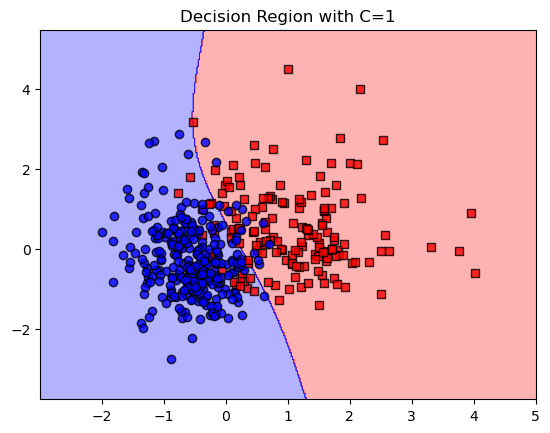

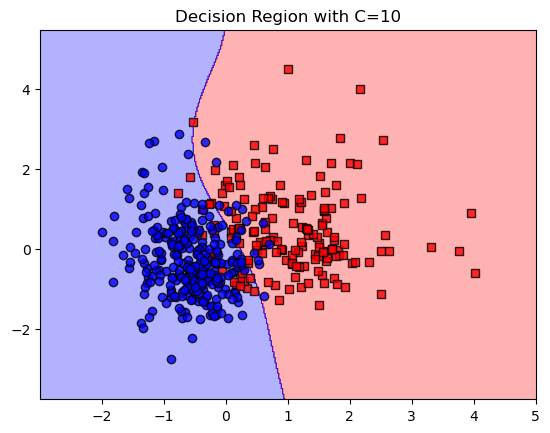

In [13]:
for Ci in C_values:
    model = SVC(C=Ci, gamma=0.1)
    model.fit(norm_train, y_train)
    
    # Create a new figure for each gamma value
    plt.figure()
    plot_decision_regions(norm_train, y_train, model)
    plt.title(f'Decision Region with C={Ci}')
    plt.show()

---
## Part 4: Submission 

Please upload a clean version of your work to Brightspace by the deadline. <em>If you use a separate PDF with your short answer questions, it should be added alongside the ipynb file as a PDF, and zipped up together as your solution.</em>

Below, please acknowledge your collaborators as well as any resources/references (beyond guides to Python syntax) that you have used in this assignment:

<font color='blue'>
Mainly ChatGPT. The sklearn documentation of SVC and the load_breast_cancer dataset is also used and studied. Andrew's course note for deriving the equations for the very first question.